In [1]:
# Import required modules
import sys
import os

# Add src to path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))


from database.sleep_queries import get_recent_sleep_data, SleepDataExtractor, get_sleep_data_by_date_range
from visualization.sleep_chart import create_sleep_chart
from visualization.sleep_utils import calculate_sleep_metrics


In [11]:
# Load recent sleep data from database
sleep_data = get_sleep_data_by_date_range(start_date="2025-01-01", end_date="2025-01-07")
print(f"Found {len(sleep_data)} days of sleep data:")
for data in sleep_data:
    print(f"  {data['day']}: {data['bedtime']} - {data['wake_time']}")

# Show full dates too
print("\nFull dates:")
for data in sleep_data:
    print(f"  {data['full_date']}: {data['bedtime']} - {data['wake_time']}")


Found 7 days of sleep data:
  01/01: 03:06 - 07:49
  01/02: 23:57 - 05:09
  01/03: 00:38 - 06:18
  01/04: 01:09 - 07:00
  01/05: 02:02 - 05:30
  01/06: 02:23 - 07:37
  01/07: 00:46 - 08:32

Full dates:
  2025-01-01: 03:06 - 07:49
  2025-01-02: 23:57 - 05:09
  2025-01-03: 00:38 - 06:18
  2025-01-04: 01:09 - 07:00
  2025-01-05: 02:02 - 05:30
  2025-01-06: 02:23 - 07:37
  2025-01-07: 00:46 - 08:32


/Users/mgartner/Documents/personal_projects/healthdatabase/src/visualization/sleep_chart.py:188: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/mgartner/Documents/personal_projects/healthdatabase/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


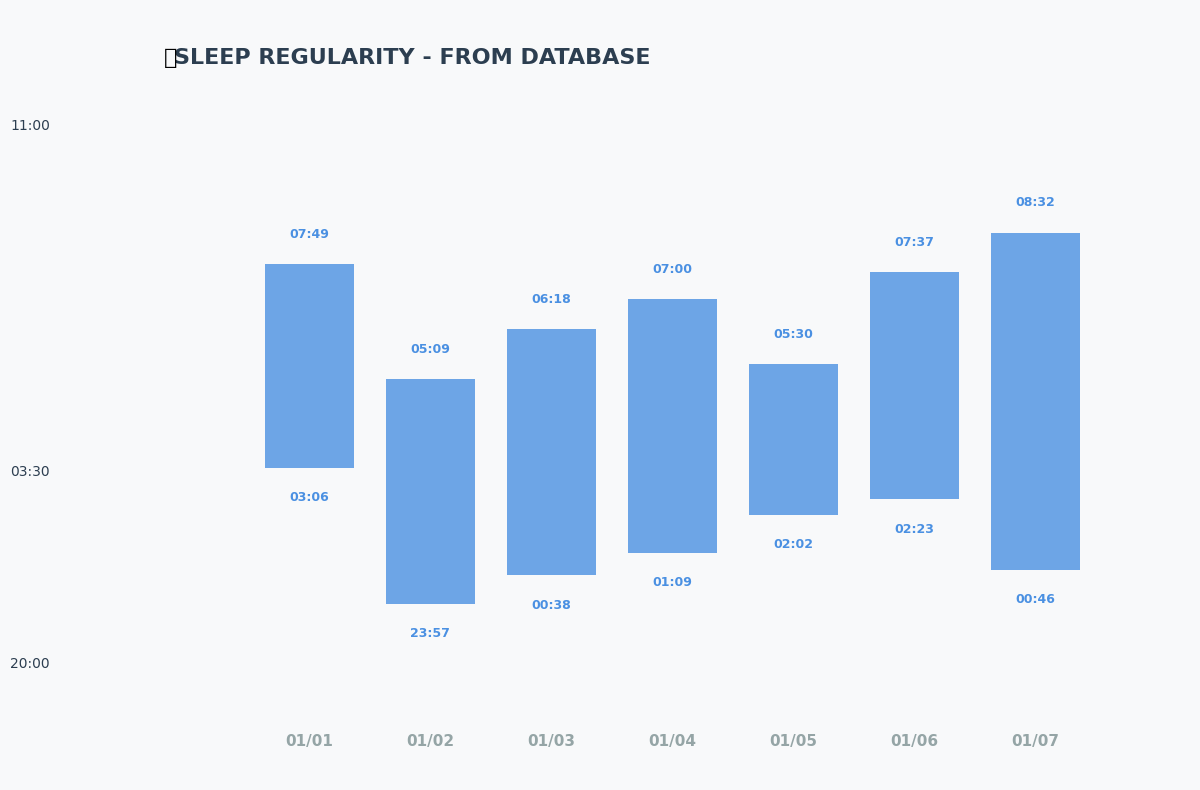

Sleep Metrics:
  Average Duration: 5.4 hours
  Sleep Consistency: 37.5%
  Average Bedtime: 4.9 hours
  Average Wake Time: 6.8 hours


In [12]:
# Create sleep chart with real dates
chart = create_sleep_chart(
    sleep_data=sleep_data,
    title="SLEEP REGULARITY - FROM DATABASE",
    figsize=(12, 8)
)

# Display the chart
chart.show()

# Calculate and show sleep metrics
metrics = calculate_sleep_metrics(sleep_data)
print("Sleep Metrics:")
print(f"  Average Duration: {metrics['avg_duration']:.1f} hours")
print(f"  Sleep Consistency: {metrics['sleep_consistency']:.1f}%")
print(f"  Average Bedtime: {metrics['avg_bedtime']:.1f} hours")
print(f"  Average Wake Time: {metrics['avg_wake_time']:.1f} hours")
